In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

## Affine Invariant proposal
Suppose that your posterior has a wierd shape (it's much thinner along one direction and very long along another; a very anisotropic distribution), then using MH to sample this distribution will be very inefficient. One smart way to circunvent this issue would be by implementing a change of variables, an **affine transformation** (which is an invertible map that's a generalization of the linear transformation).

So, by implementing a smart affine tranformation to your variables (say you do $x1,x2 \rightarrow y_1, y2$, where Y = AX +B) your posterior would have a better shape to sample. After your MCMC converges and finishes to sample over the tranformed space, you can go just back to the original one and recover orginal target distribution. 

Application areas are in sampling continuous densities with arbitrary scale and correlation structure. In applications where a change of variables will be applied to improve sampling from distributions with correlation.

## Ensemble Sampler

But the issue is that you most likely don't know what your target (posterior) distribution looks like so you can’t do this kind of transformation by hand. The core idea to solve this issue is to follow many **walkers** that are simultaneously sampling the distribution. 

The proposal of each walker will depend on the relative location of the other walkers. This allow the walker to evolve through parameter space, stretching and shrinking in ways that follow the posterior

The **walkers** can be seen as copies of our system of chains (copies in an ensemble). The new position for one copy is suggested by an affine invariant tranformation which is built usinf the current positions of the other copies in the ensemble.





## Stretch Move

A stretch move is an **affine invariant transformation**. We move a walker $X_k$ using *one* **complementary walker** $X_j \in \vec{X}_{[k]}$(t) chosen uniformly (from a random distribution). The proposal move is generated by stretching along the straight line connecting $X_j \,\, \text{to}\,\, X_k$.

$X_k(t) \rightarrow Y = X_j + Z[X_k(t)-X_j]$ (1)

where the probability density of the **scaling variable $Z$** satisfies

#### $g(1/z) = zg(z)$ 
if g(z) satisfies the condition above, then the move (eq. 1) is symetric in the sense that satisfies the *detailed balance condition* (probability of a walker that's currently on configuration X(t) to transit to Y is equal to the probability of a walker that's currently on configuration Y to transit to X_k(t))

$\text{Pr}(X_k(t)\rightarrow Y) = \text{Pr}(Y\rightarrow X_k(t))$

<div>
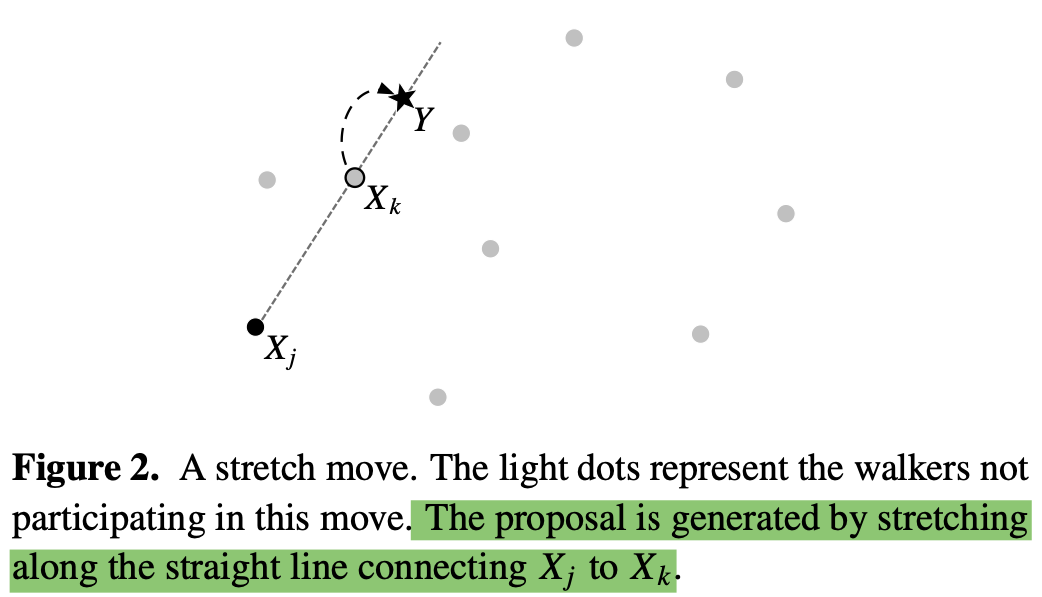
</div>


They find that a very good probability distribution from which to select $Z$ is
### $g(z) \propto \begin{cases}  &1/\sqrt{Z} \,\,\, \text{if} \,\,\, z\in\left[ 1/a, a \right] \\
&0 \,\,\, \text{otherwise} \end{cases}$

where $a$ is an adjustable parameter that GW10 set to 2.

Text(0, 0.5, 'g(z)')

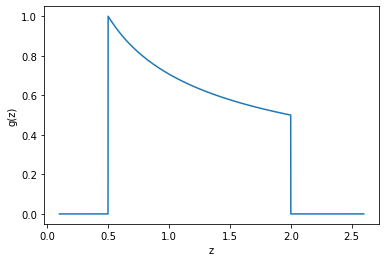

In [3]:
a=2.
zo = 1./a
zf = a

#distribution must inegrate to unit
Integral = lambda zo,zf: 2.*np.sqrt(zf) - 2.*np.sqrt(zo)
norm = 1./Integral(zo,zf)


g = lambda x: norm/np.sqrt(x)
z_list = np.arange(0.1, 2.6, 0.001)


gz=[]
for z in z_list:
    if z >= 1./a and z <= a:
        gz.append(g(z))
    else:
        gz.append(0.)

plt.plot(z_list, gz)
plt.xlabel('z')
plt.ylabel('g(z)')

#need to sample a random number from this distribution!


### Acceptance
The proposal is accepted with probability similar to the single particle Metropolis-Hastings sampler, 
### $q = \text{min}\left( 1, Z^{N-1} \frac{p(Y)}{p(X_k(t))} \right)$
where $p(Y)$ is the posterior probability of $Y$ and $N$ is the dimension of the parameter space. The
acceptance probability depends on the ratio of the target densities at the current and proposal points, withan additional factor $Z^{n−1}$
arising because the proposed position is chosen from a one dimensional subset of the n-dimensional space

## A single stretch move update step 

1. for each walker k=1,...,K do
2. Draw a walker $X_j$ at random from the complementary ensemble $S_{[k]}(t)$
3. $z\leftarrow Z \approx g(z)$
4. $Y \leftarrow X_j + z[X_k(t) - X_j]$
5. $q\leftarrow z^{-1} p(Y)/p(X_k(t))$    This line is generally expensive 
6. $r\leftarrow R \approx [0, 1]$
7. if $r\leq q$, Equation (9) then
8. $X_k(t+1) \leftarrow  Y$
9. else
10. $X_k(t+1) \leftarrow  X_k(t)$
11. end if
12. end for

In [8]:
from numpy.random import default_rng
seed = 9812631
rng = default_rng(seed)

## log likelihood and log prior



In [98]:
# need to adapt this to an arbitrary choice of parameters
# model = BAO scale
def lnlike(theta, data, cov):
    return -0.5 * np.sum( ( (data - model(theta, x))/cov ) ** 2 )

def lnprior(theta, Range):
    #Range = 
    omega_m, omega_lambda = theta
    for param in theta:
    if 0.0 <= omega_m <= 1.0 and 0.0 < a2 < 1.0:
        return 0.0
    return -np.inf

def lnprob(theta, data, cov):
    return lnlike + lnprior

In [4]:
class Sampler():
    """
    An abstract sampler object that implements various helper functions

    :param dim:
        The number of dimensions in the parameter space.
        
    :param nwalker:
        The number of walker in the parameter space.

    :param lnpostfn:
        A function that takes a vector in the parameter space as input and
        returns the natural logarithm of the posterior probability for that
        position.

    """
    def __init__(self, dim, nwalker):
        self.dim     = dim
        self.nwalker = nwalker
        
        assert self.k % 2 == 0, "The number of walkers must be even."
        
    def prior(self, dim):
        
    def sample(prior):

In [28]:
5%2

1

In [22]:
sampler = Sampler( dim = 1 )
dim = sampler.dim
print(dim)

1


## Step 3: draw random number from g(z)


In [57]:
#Step 3: draw random number from g(z)

#distribution must integrate to unit

def test_rand_stretch(a=2):
    """
    Draws one random scaling variable z from the probability density g(z)
    
    :param a: integer that defines the interval g(z), default = 2
    
    
    This function returns:
    
    zz:  The scaling valiable for one move  
    
    """
    
    zo       = 1./a
    zf       = a
    
    Integral = 2.*(np.sqrt(zf) - np.sqrt(zo)) #integral of stretch distrib. funct over the interval [1/a, a]
    norm     = 1./Integral
    
    #draws a random number from a uniform pdf
    uniform  = rng.uniform( low=0, high=1 )
    
    #draws a random scaling variable z, from the inverse cumulative distribution function and a uniform random number
    zz       = ( uniform/(2*norm) + np.sqrt(zo) )**2
    
    return zz


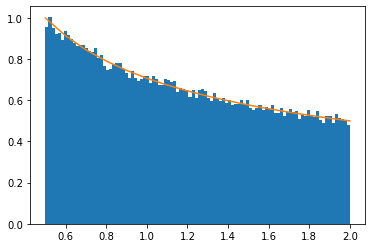

<Figure size 432x288 with 0 Axes>

In [58]:
#Assess if the generated random numbers are following the specified pdf
def norm(a=2.):
    zo = 1./a
    zf = a
    
    Integral = 2.*(np.sqrt(zf) - np.sqrt(zo))

    return 1./Integral

def g(z, a, norm=norm):
    Norm = norm(a)
    return Norm/np.sqrt(z)



sample = []
  
for i in range(100000):
 
 
    tr = test_rand_stretch()
 
    sample.append( tr )

    
plt.hist( sample, 100, density=True)

z = np.arange(0.5, 2.1, 0.1)
plt.plot(z, g(z, a=2))
 
plt.figure()
 
plt.show()

In [60]:
# Same function as rand_stretch but for many walkers

#Step 3: draw random number from g(z)

#distribution must integrate to unit

def rand_stretch(nwalker=2, a=2):
    """
    Draws one random scaling variable z from the probability density g(z)
    
    :param nwalker: integer, number of walkers
    :param a:       integer, defines the interval g(z) as [1/a, a], default = 2
    
    
    
    This function returns:
    
    zz:  Array with the scaling valiable for one move per walker  
    
    """
    
    zo       = 1./a
    zf       = a
    
    Integral = 2.*(np.sqrt(zf) - np.sqrt(zo)) #integral of stretch distrib. funct over the interval [1/a, a]
    norm     = 1./Integral
    
    #draws a random number from a uniform pdf
    uniform  = rng.uniform( low=0, high=1, size=nwalker )
    
    #draws a random scaling variable z, from the inverse cumulative distribution function and a uniform random number
    zz       = ( uniform/(2*norm) + np.sqrt(zo) )**2
    
    return zz


## Step 4-6: Propose a move and see if it's accepted or not


4. $Y \leftarrow X_j + z[X_k(t) - X_j]$
5. $q\leftarrow z^{-1} p(Y)/p(X_k(t))$    This line is generally expensive 
6. $r\leftarrow R \approx [0, 1]$

In [129]:
#improve this function to all walkers at the same time
def propose_stretch(ndim, nwalker, walkers, lnprob0):
        """
        Propose a new position for one walker given the position of
        another.

        :param ndim:
            Parameter-space dimension 
            
        :param nwalker:
            The number of walkers 

        :param walkers:
            An array (nwalker, ndim) with the current position of all walkers 

        :param lnprob0:
            The log-probabilities at ``p0``.

        This function returns:

        * q: The new proposed positions for the walkers in ``ensemble``.

        * newlnprob: The vector of log-probabilities at the positions
          given by 'q'.

        * accept: An array of `booleans` informing whether or not
          the proposed position for each walker was accepted.

        """
        
        zz = rand_stretch(a, nwalker) #scaling variable


        # Generate the vectors of random numbers that will produce the
        # proposal.
        zz = rand_stretch()  #
        rint = rng.integers(nwalker)
        
        accept = []
        for i in range(nwalker):
            p0           = walkers[i,:]
            compl_walker = np.delete(walkers, i,0) #list of complementary walkers of p0

            #sort a random complementary walker to propose a move
            rint         = rng.integers(nwalker)
            p1           = compl_walker[rint]

            # Calculate the proposed positions and the log-probability there.
            y = p1 + zz * (p0 - p1)
            newlnprob = lnprob(y)

            # Decide whether or not the proposal should be accepted.
            lnRatio = (ndim - 1.) * np.log(zz) + newlnprob - lnprob0
            lnRatio = min(0.0, lnRatio)

            # draw a random number from a uniform distribution and compare with lnRatio
            alpha  = rng.uniform(low=0, high=1, size=ndim)
            accept.append(lnRatio > np.log(alpha))

        return y, newlnprob, accept

In [168]:
#test code above
ndim=2
walkers = np.array([[1.,2.], [1.1,2.1], [0.1, 0.2], [0.3, 0.4]]) #list of 4 walkers in a 2D parameter space
print(walkers.shape)

zz = rand_stretch()  #
rint = rng.integers(nwalker)
        
accept = []
for i in range(4):    
    p0           = walkers[i,:]
    compl_walker = np.delete(walkers, i,0) #list of complementary walkers of p0

        #sort a random complementary walker to propose a move
    rint         = rng.integers(nwalker)
    p1           = compl_walker[rint]

        # Calculate the proposed positions and the log-probability there.
    y = p1 + zz * (p0 - p1)
    newlnprob = np.array([-900, -1])

        # Decide whether or not the proposal should be accepted.
    lnRatio = (ndim - 1.) * np.log(zz) + newlnprob - ( np.array([-700, -2]) )
    #lnRatio = min(0.0, lnRatio)

    alpha  = rng.uniform(low=0, high=1, size=ndim)
    accept.append( lnRatio > np.log(alpha) )
print(accept)

(4, 2)
[array([False,  True]), array([False,  True]), array([False,  True]), array([False,  True])]


## Steps 7-10: Update position

7. if $r\leq q$, Equation (9) then
8. $X_k(t+1) \leftarrow  Y$
9. else
10. $X_k(t+1) \leftarrow  X_k(t)$

In [125]:
def update_position(ndim, nwalker, walkers, lnprob0):
        """
        Update the positions of one walker based on the MH acceptance criteria

        :param ndim:
            Parameter-space dimension 
            
        :param nwalker:
            The number of walkers 

        :param walkers:
            An array (nwalker, ndim) with the current position of all walkers 

        :param lnprob0:
            The log-probabilities at ``p0``.

        This function returns:

        * q: The new proposed positions for the walkers in ``ensemble``.

        * newlnprob: The vector of log-probabilities at the positions
          given by 'q'.

        * accept: An array of `booleans` informing whether or not
          the proposed position for each walker was accepted.

        """
        
        p #position vector 
        y, newlnprob, accept = propose_stretch(ndim, nwalker, walkers, lnprob0)
        
        if np.any(accept):
        #update lnposterior and position vector
            lnprob[accept] = newlnprob
            p[accept]      = y[accept]
            

[0.93818683 0.278053  ] [-0.06380617 -1.27994352]


In [185]:
chain = np.zeros((nwalker, nsteps, ndim))
print( chain[0,0] )

[0. 0. 0.]


In [172]:
?? np.concatenate

In [ ]:
def reset(nsteps, nwalker, ndim):
    """
    Clear the ``chain`` and ``lnprobability`` array. Also reset the
    bookkeeping parameters.

    """
    naccepted = np.zeros(nwalker)
    _chain = np.empty((nwalker, nsteps, ndim))
    _lnprob = np.empty((nwalker, 0))

If you are given random numbers drawn from a uniform distribution between 0 and 1. Then, if you transform these, using the inverse function of the cdf of the desired distribution, the resulting numbers are distributed according to the desired distribution